# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/kimberleyng/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
from newsapi import NewsApiClient
load_dotenv()
api_key = os.getenv('NEWS_API')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin',
                                  language='en', 
                                  sort_by='relevancy')
btc_news['totalResults']

8345

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum',
                                  language='en',
                                  sort_by='relevancy')
eth_news['totalResults']

3801

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []
for article in btc_news["articles"]:
    text = article["content"]
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    positive = sentiment["pos"]
    neutral = sentiment["neu"]
    negative = sentiment["neg"]
    dictionary = {"Compound": compound, "Negative": negative, "Neutral": neutral, "Positive": positive, "text": text}
    btc_sentiment.append(dictionary)     
btc_df = pd.DataFrame(btc_sentiment)
btc_df


,Compound,Negative,Neutral,Positive,text
0,0.5859,0.000,0.876,0.124,Even if you arent paying attention to Bitcoin ...
1,0.3182,0.000,0.895,0.105,El Salvador introduced Bitcoin as a legal tend...
2,-0.4404,0.083,0.917,0.000,Were officially building an open Bitcoin minin...
3,-0.3182,0.084,0.871,0.045,Israeli national Tal Prihar pled guilty to rou...
4,0.0000,0.000,1.000,0.000,"In a new blog post the company said that 4,836..."
5,-0.7096,0.169,0.831,0.000,Netflix\r\n is making a docuseries about one o...
6,0.3612,0.000,0.932,0.068,"Bitcoin, the largest digital asset, extended i..."
7,-0.4404,0.083,0.917,0.000,Block founder Jack Dorsey has announced on Twi...
8,0.3818,0.000,0.927,0.073,Tesla Inc (TSLA.O) will accept the meme-based ...
9,0.1779,0.000,0.948,0.052,"On some level, the new mayor is simply employi..."


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiment = []
for article in eth_news["articles"]:
    text = article["content"]
    sentiment = analyzer.polarity_scores(text)
    compound = sentiment["compound"]
    positive = sentiment["pos"]
    neutral = sentiment["neu"]
    negative = sentiment["neg"]
    dictionary = {"Compound": compound, "Negative": negative, "Neutral": neutral, "Positive": positive, "text": text}
    eth_sentiment.append(dictionary)     
eth_df = pd.DataFrame(eth_sentiment)
eth_df

,Compound,Negative,Neutral,Positive,text
0,0.0000,0.000,1.000,0.000,"In a new blog post the company said that 4,836..."
1,0.0000,0.000,1.000,0.000,Hackers who made off with roughly $15 million ...
2,0.1779,0.000,0.948,0.052,"On some level, the new mayor is simply employi..."
3,0.0772,0.000,0.962,0.038,"Back in September\r\n, Robinhood announced pla..."
4,-0.2023,0.062,0.899,0.039,If people who buy cryptocurrencies intended on...
5,0.0000,0.000,1.000,0.000,This enables an L1 platform to bootstrap its n...
6,-0.1027,0.067,0.877,0.056,Trading platform Crypto.com lost about $34 mil...
7,0.0000,0.000,1.000,0.000,"The means-and-ends moralists, or non-doers, al..."
8,0.4019,0.000,0.915,0.085,Ethereum is a digital platform that runs on bl...
9,-0.0557,0.047,0.911,0.041,Crypto bros never tire of sharing their utopia...


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.00000,20.000000,20.000000
mean,-0.010415,0.05225,0.887950,0.059800
std,0.429906,0.05776,0.066743,0.057529
min,-0.709600,0.00000,0.729000,0.000000
25%,-0.426225,0.00000,0.861000,0.000000
50%,0.038600,0.04150,0.910500,0.054500
75%,0.328950,0.08850,0.928250,0.108750
max,0.680800,0.16900,1.000000,0.185000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.095105,0.022100,0.924650,0.053250
std,0.297967,0.045603,0.074845,0.054394
min,-0.680800,0.000000,0.775000,0.000000
25%,0.000000,0.000000,0.889750,0.000000
50%,0.000000,0.000000,0.931500,0.043500
75%,0.233900,0.011750,1.000000,0.090250
max,0.680800,0.174000,1.000000,0.185000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum - 0.064100

Q: Which coin had the highest compound score?

A: Ethereum - 0.757900

Q. Which coin had the highest positive score?

A: Ethereum - 0.217000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_extra = ['taken', 'in', 'are', 'of', 'on', 'pc', 'this', 'make', 'seen', 'picture', 'virtual', 'new', 'illustration',
                'ha', 'said', 'york', 'wa', 'us']

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    clean_txt = regex.sub(' ', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(clean_txt)
    
    # Lemmatize words into root words
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and remove stop words
    words = [word.lower() for word in tokens if word.lower() not in sw.union(sw_extra)]

    return tokens

In [13]:
# Create a new tokens column for Bitcoin
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kimberleyng/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kimberleyng/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
# Create a new tokens column for Ethereum
btc_df["tokens"] = btc_df["text"].apply(tokenizer)

btc_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.5859,0.000,0.876,0.124,Even if you arent paying attention to Bitcoin ...,"[Even, if, you, arent, paying, attention, to, ..."
1,0.3182,0.000,0.895,0.105,El Salvador introduced Bitcoin as a legal tend...,"[El, Salvador, introduced, Bitcoin, a, a, lega..."
2,-0.4404,0.083,0.917,0.000,Were officially building an open Bitcoin minin...,"[Were, officially, building, an, open, Bitcoin..."
3,-0.3182,0.084,0.871,0.045,Israeli national Tal Prihar pled guilty to rou...,"[Israeli, national, Tal, Prihar, pled, guilty,..."
4,0.0000,0.000,1.000,0.000,"In a new blog post the company said that 4,836...","[In, a, new, blog, post, the, company, said, t..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc = btc_df['text'].str.cat()
btc_text = tokenizer(btc)
btc_counts = Counter(ngrams(btc_text, n=2))
btc_counts.most_common(10)

[(('of', 'the'), 4),
 (('mining', 'system'), 4),
 (('El', 'Salvador'), 3),
 (('Illustration', 'by'), 3),
 (('by', 'Alex'), 3),
 (('Alex', 'Castro'), 3),
 (('Castro', 'The'), 3),
 (('The', 'Verge'), 3),
 (('building', 'an'), 3),
 (('an', 'open'), 3)]

In [17]:
# Generate the Ethereum N-grams where N=2
eth = eth_df['text'].str.cat()
eth_text = tokenizer(eth)
eth_counts = Counter(ngrams(eth_text, n=2))
eth_counts.most_common(10)

[(('million', 'in'), 4),
 (('in', 'char'), 4),
 (('that', 'the'), 4),
 (('a', 'new'), 3),
 (('blog', 'post'), 3),
 (('the', 'company'), 3),
 (('made', 'off'), 3),
 (('off', 'with'), 3),
 (('Crypto', 'com'), 3),
 (('to', 'a'), 3)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
btc_token_count = token_count(btc_text)
btc_count_df = pd.DataFrame(list(btc_token_count), columns=['bigram', 'count'])
btc_count_df

,bigram,count
0,the,33
1,a,21
2,char,20


In [20]:
# Use token_count to get the top 10 words for Ethereum
eth_token_count = token_count(eth_text)
eth_count_df = pd.DataFrame(list(eth_token_count), columns=['bigram', 'count'])
eth_count_df

,bigram,count
0,the,29
1,a,21
2,char,19


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

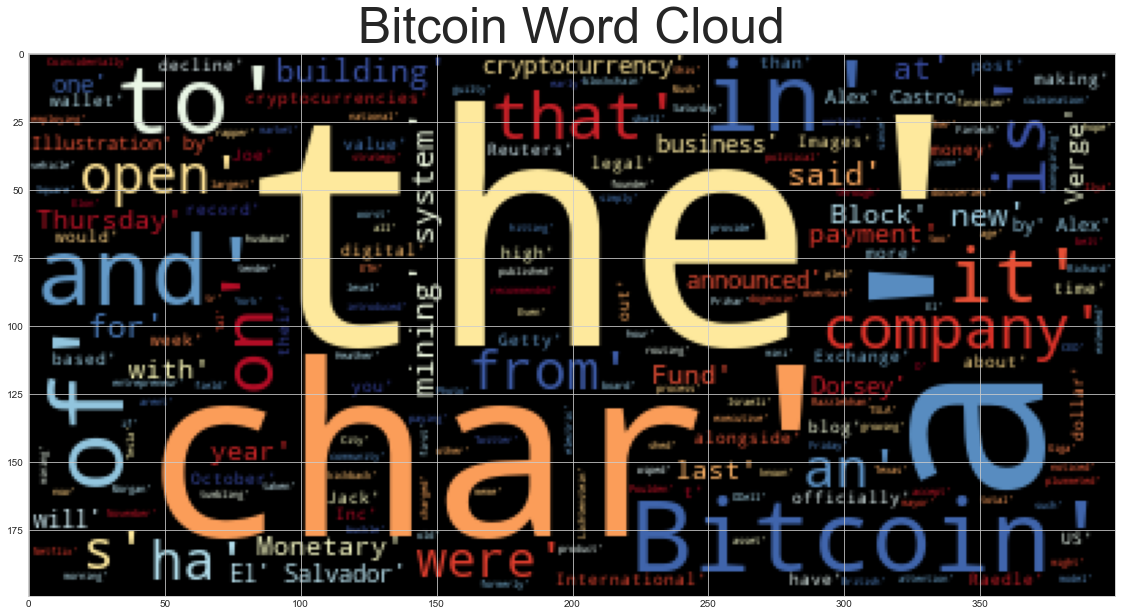

In [22]:
# Generate the Bitcoin word cloud
btc_processed = str(btc_text)

btc_wordcloud = WordCloud(colormap='RdYlBu').generate(btc_processed)
plt.title("Bitcoin Word Cloud", fontsize=50)
plt.imshow(btc_wordcloud)

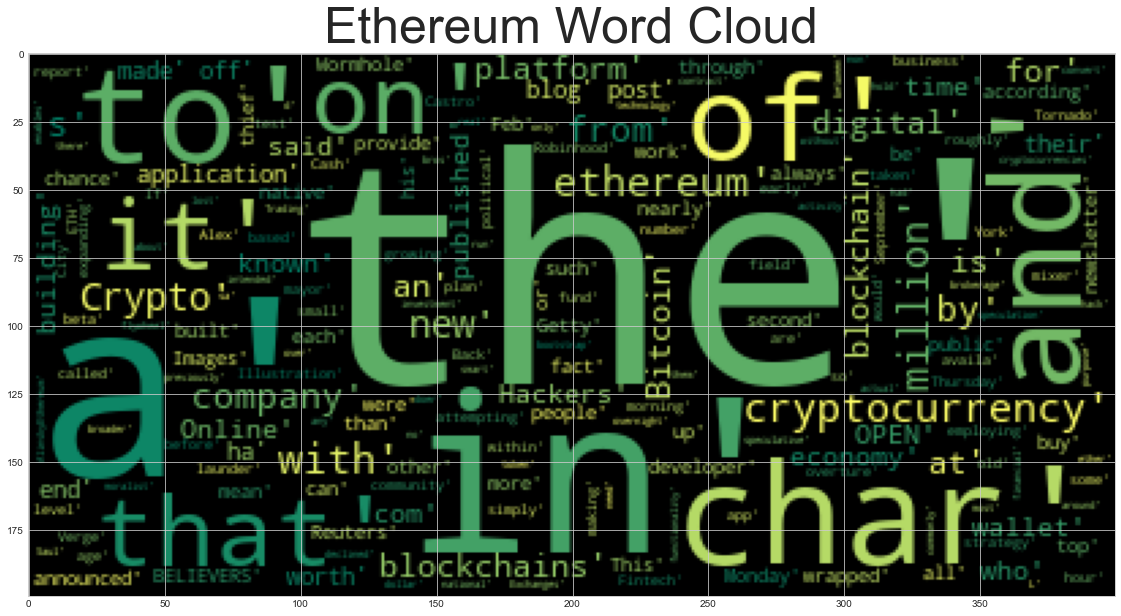

In [23]:
# Generate the Ethereum word cloud
eth_processed = str(eth_text)

eth_wordcloud = WordCloud(colormap='summer_r').generate(eth_processed)
plt.title("Ethereum Word Cloud", fontsize=50)
plt.imshow(eth_wordcloud)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
big_string_btc = ' '.join(btc_df['text'])

In [28]:
# Run the NER processor on all of the text
btc_doc = nlp(big_string_btc)

# Add a title to the document
btc_doc.user_data["title"] = "Bitcoin NER"

In [29]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [30]:
# List all Entities
btc_text = [ent.text for ent in btc_doc.ents]
btc_label = [ent.label_ for ent in btc_doc.ents]

btc_entities = pd.DataFrame(columns=['text','label'])
btc_entities['text'] = btc_text
btc_entities['label'] = btc_label

btc_entities

,text,label
0,last week,DATE
1,3,MONEY
2,El Salvador,GPE
3,US,GPE
4,2021,DATE
...,...,...
74,$4.5 billion,MONEY
75,September,DATE
76,Robinhood,ORG
77,one,CARDINAL


---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
big_string_eth = ' '.join(eth_df['text'])

In [32]:
# Run the NER processor on all of the text
eth_doc = nlp(big_string_eth)

# Add a title to the document
eth_doc.user_data["title"] = "Ethereum NER"

In [33]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [34]:
# List all Entities
eth_text = [ent.text for ent in eth_doc.ents]
eth_label = [ent.label_ for ent in eth_doc.ents]

eth_entities = pd.DataFrame(columns=['text','label'])
eth_entities['text'] = eth_text
eth_entities['label'] = eth_label

eth_entities

,text,label
0,"4,836",CARDINAL
1,ETH,ORG
2,443,CARDINAL
3,Alex Castro,PERSON
4,Verge,ORG
...,...,...
58,Bitcoin,PERSON
59,23.2%,PERCENT
60,TIME,ORG
61,weekly,DATE


---